# K-Nearest Neighbors: Classifying Supermarkets by Brand

In this notebook, we will use **K-Nearest Neighbors (KNN)** to classify supermarkets based on their brand.
The goal is to predict the supermarket brand (e.g., Spar, ALDI, Lidl, Migros) using features like population density, percentage of foreigners, employment rate, and latitude and longitude.

KNN is a simple supervised learning algorithm used for classification, where an object is classified by the majority label of its neighbors.

## Libraries and Settings

In [1]:
# Libraries
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\GitHub_Repositories\python_machine_learning_basics\KNN


## Import Data

In [2]:
# Load the supermarket dataset
df = pd.read_csv('./Data/supermarkets_data_enriched.csv', 
                 sep=',', 
                 encoding='utf-8',
                 index_col=0)

# Show dimension (rows, columns)
print(df.shape)

# Show the first 5 rows
df.head()

(3242, 17)


,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,POINT (9.0379152 47.1556157),227,Schänis,3315,3876,97.142857,13.054696,1408.0
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
3,node,9019298862,47.155185,9.038472,Lidl,supermarket,NaN,NaN,NaN,POINT (9.0384722 47.1551854),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0


## Data Preprocessing

### Remove rows with missing or duplicated values

In [3]:
# Remove rows with missing values
df = df.dropna()

# Remove rows with duplicated values
df = df.drop_duplicates()

### Change brand names to upper

In [4]:
# Change brand names to uppercase
df['brand'] = df['brand'].str.upper()

### Create a subset of the data with defined brands

In [5]:
# Select subset of supermarket data (reset the index in the subset)
df_sub = df[df['brand'].isin(['SPAR', 'LANDI', 'MIGROS', 'ALDI'])].reset_index(drop=True)
df_sub.head()

,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
1,node,36726161,47.226191,8.980329,MIGROS,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
2,node,48932835,47.375020,8.522895,MIGROS,supermarket,Zürich,7,8004.0,POINT (8.522895 47.37502),77,Zürich,261,420217,4778.994655,32.458468,491193.0
3,node,75749133,47.340967,8.530601,ALDI,supermarket,Zürich,81,8038.0,POINT (8.5306007 47.3409666),77,Zürich,261,420217,4778.994655,32.458468,491193.0
4,node,83330862,47.344749,8.529981,MIGROS,supermarket,Zürich,3,8038.0,POINT (8.5299814 47.3447487),77,Zürich,261,420217,4778.994655,32.458468,491193.0


### Select relevant features for classification

In [6]:
# Select relevant features for classification
features = ['pop_dens', 'frg_pct', 'emp', 'lat', 'lon']
X = df_sub[features]
y = df_sub['brand']

### Split the data into training and testing sets

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (removes the mean and scales to unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training: K-Nearest Neighbors

In [8]:
# Initialize the KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Model Evaluation

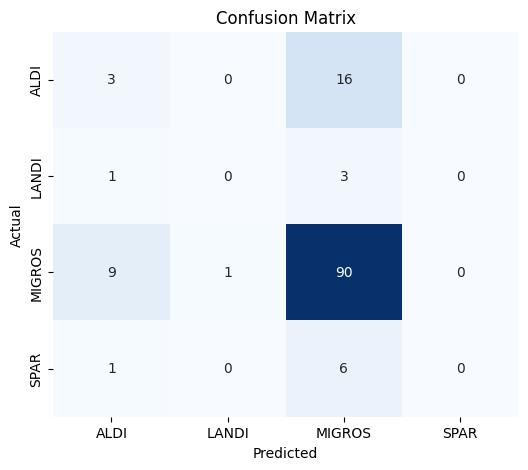


Classification report:
               precision    recall  f1-score   support

        ALDI       0.21      0.16      0.18        19
       LANDI       0.00      0.00      0.00         4
      MIGROS       0.78      0.90      0.84       100
        SPAR       0.00      0.00      0.00         7

    accuracy                           0.72       130
   macro avg       0.25      0.26      0.25       130
weighted avg       0.63      0.72      0.67       130



In [9]:
# Predict on the test set
y_pred = knn.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_,
            cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('\nClassification report:\n', classification_report(y_test, y_pred))

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-09-25 20:08:51
Python Version: 3.11.9
-----------------------------------
